In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.simplefilter("ignore")

#r2_score(y_test, y_pred)

df=pd.read_csv (r"C:\Users\Admin\Downloads\day (1).csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
###Drop un wanted Columns and Renaming

df['season']=df['season'].map({1:"spring", 2:"summer", 3:'fall', 4:'winter'})
df['yr']=df['yr'].map({0: '2018', 1:'2019'})
df['mnth']=df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df['weathersit']=df.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
df['weekday']=df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


In [10]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


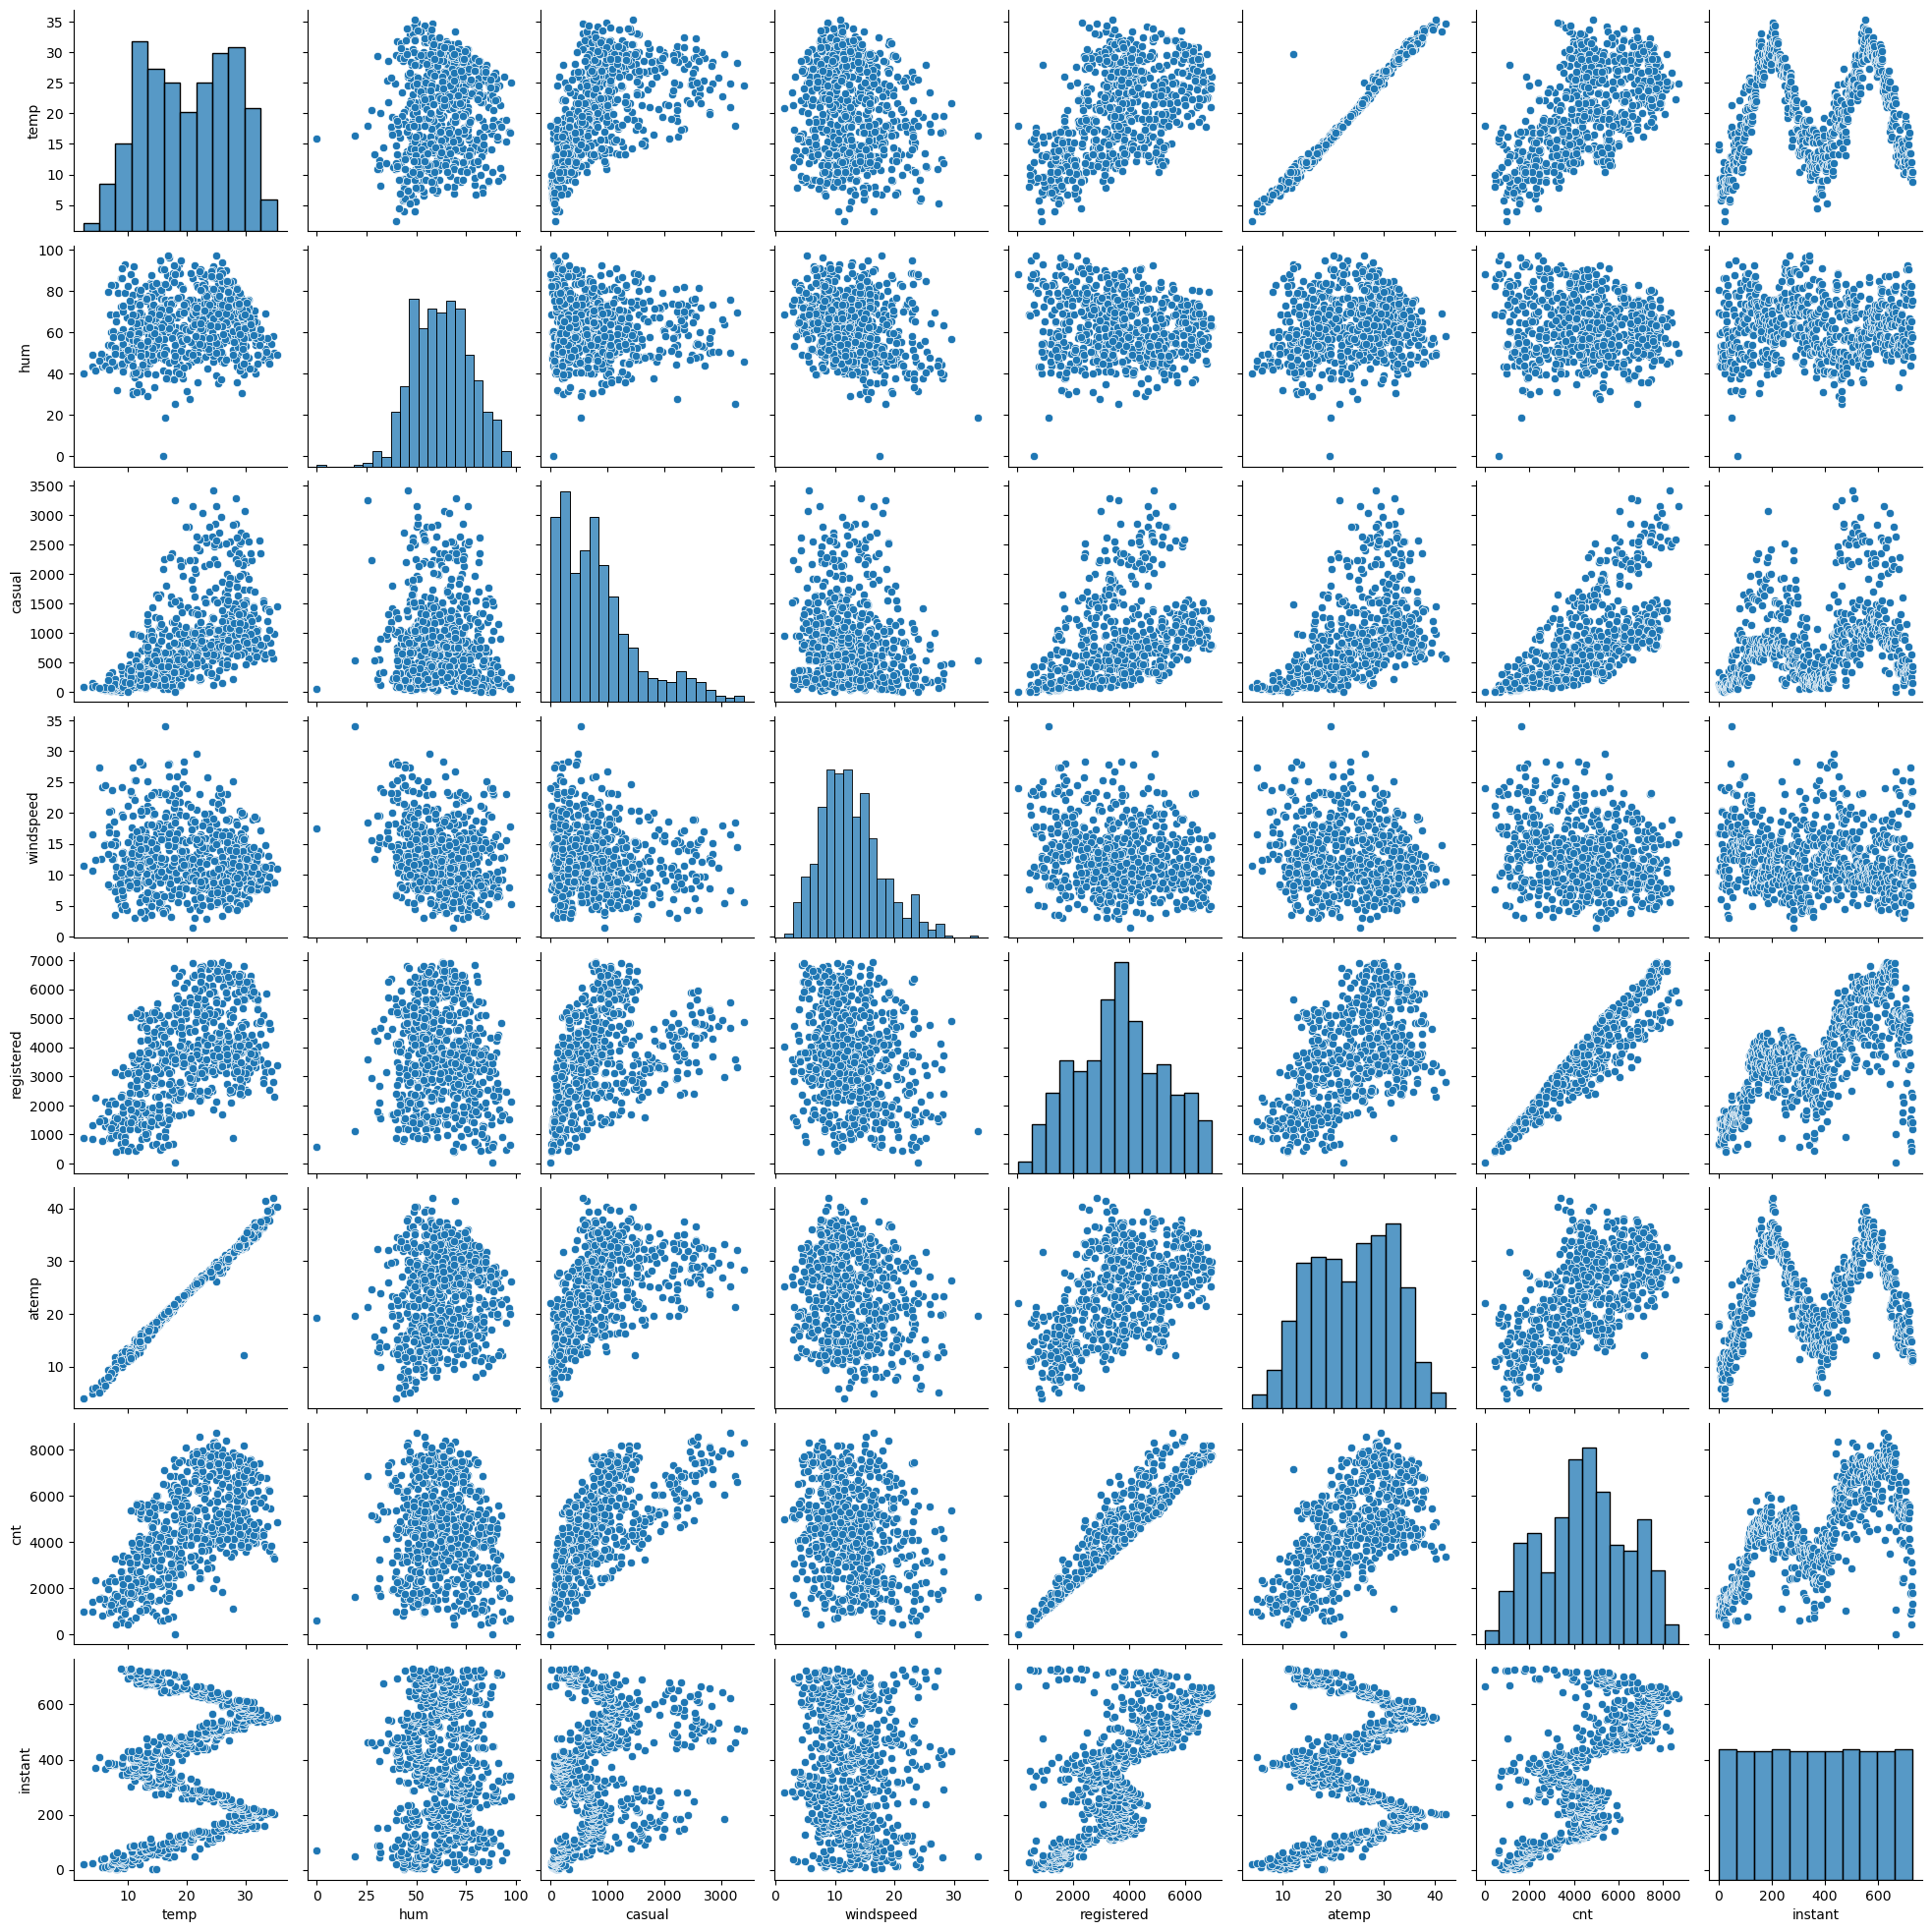

In [11]:
############################ STEP 2 :Visulaizing the data ###################################################

# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

sns.pairplot(df, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

In [12]:
df.describe()

,instant,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


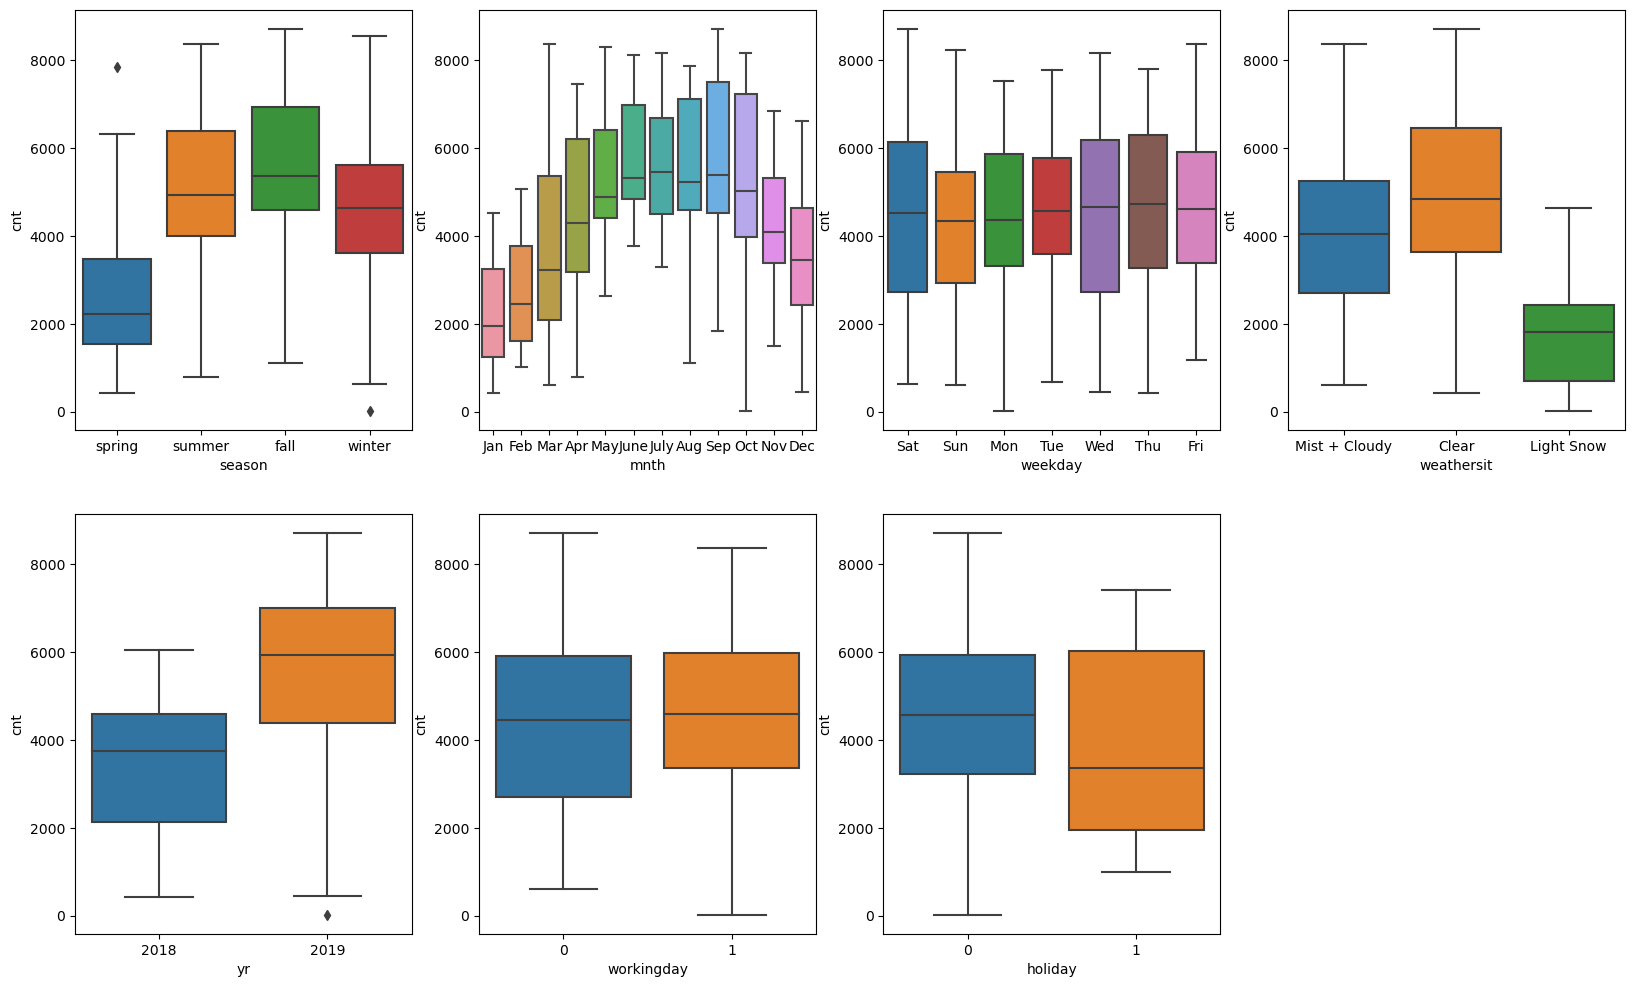

In [14]:
#visualizing the categorical variables of the dataset using barplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.boxplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

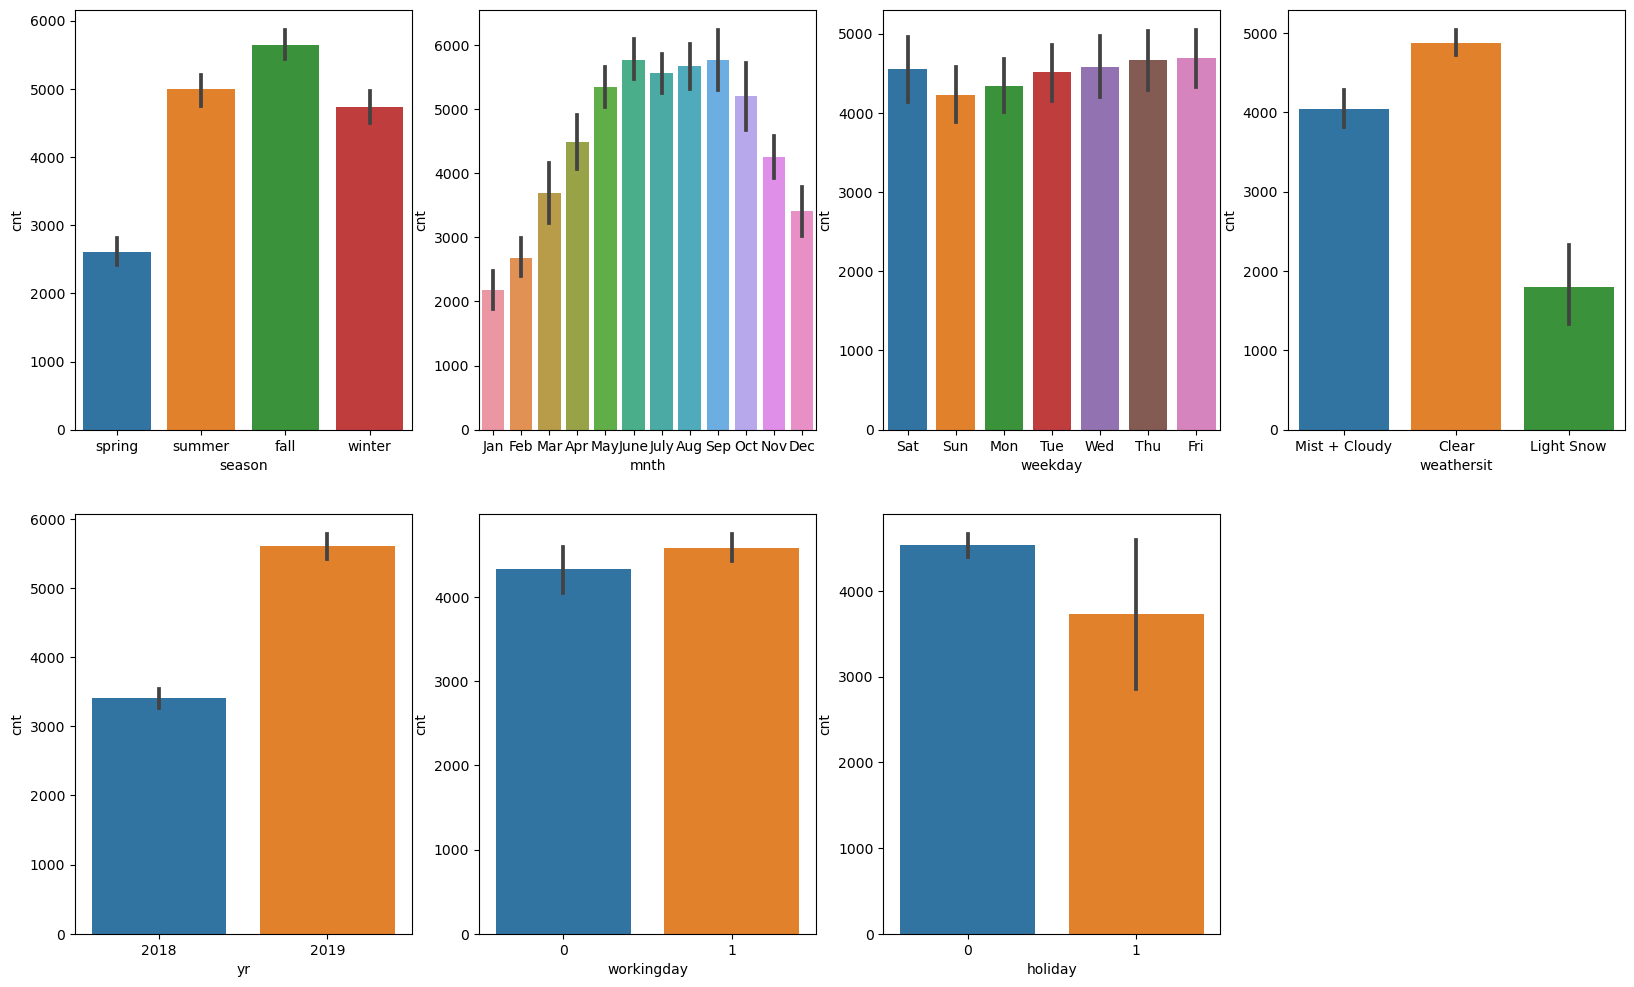

In [15]:
#visualizing the categorical variables of the dataset using barplot 
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.barplot(x='season', y='cnt', data=df)
plt.subplot(2, 4, 2)
sns.barplot(x='mnth', y='cnt', data=df)
plt.subplot(2, 4, 3)
sns.barplot(x='weekday', y='cnt', data=df)
plt.subplot(2, 4, 4)
sns.barplot(x='weathersit', y='cnt', data=df)
plt.subplot(2, 4, 5)
sns.barplot(x='yr', y='cnt', data=df)
plt.subplot(2, 4, 6)
sns.barplot(x='workingday', y='cnt', data=df)
plt.subplot(2, 4, 7)
sns.barplot(x='holiday', y='cnt', data=df)
plt.show()

##Some of the observations from the plots above are as follows####

###People are more likely to rent bikes in the fall and the summer season.
###Bike rental rates are the most in June,july,aug,sept and October.
###Saturday,monday,tuesday, Wednesday,Thursday and friday are the days where more bikes are rented
###Most bike rentals take place in the clear weather
###More bikes were rented in 2019
###There is no big discernable difference in bike rental rates depending on whether it's a working day or not
###Bike rental rates are higher on holidays

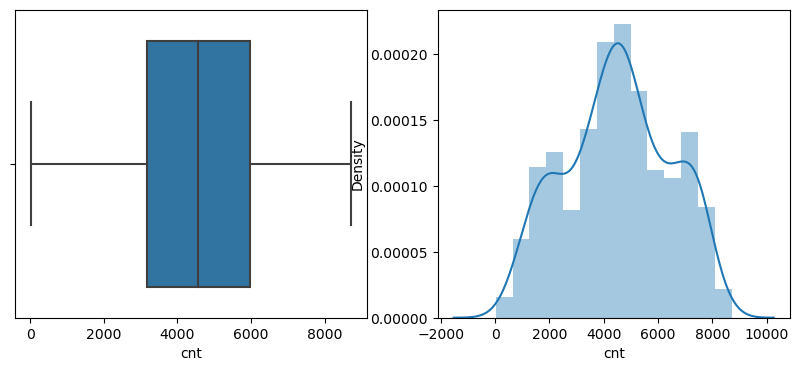

In [16]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.boxplot(df["cnt"])
plt.subplot(1,2,2)
sns.distplot(df["cnt"])
plt.show()

In [17]:
#Lets see correlation between numerical features using heatmap.

num_df=df[['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [18]:
num_df.corr()

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<AxesSubplot:>

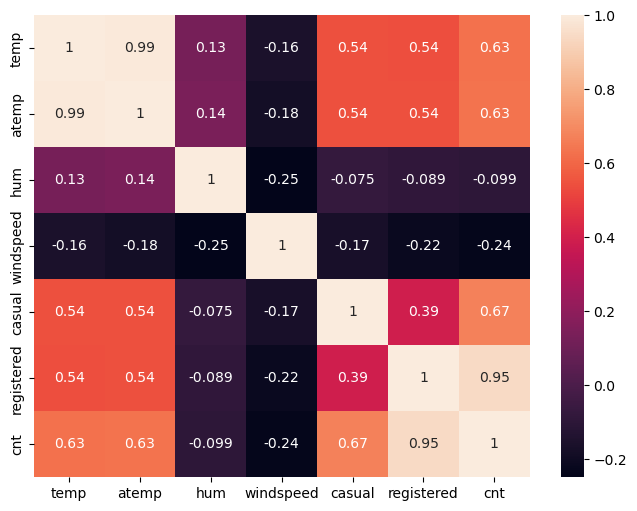

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(),annot=True)

##temp and atemp have very strong correlation.
##registered,casual have also strong correlation with cnt.

In [20]:
##Encode the data using get dummies

# dropping the columns which are not helpfull in our analysis.
#atemp is not needed as temp is already being used, dteday and casual are also not required for regression analysis 
df = df.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [21]:
#creating dummy variables
enc_df=pd.get_dummies(df,columns=['season','yr','mnth','weekday','weathersit'],drop_first=True)

In [22]:
enc_df.head()

,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
##Train Split 

X=enc_df.drop(['cnt'],axis=1)
Y=enc_df['cnt']

In [24]:
#splitting the dataset into train and test sets
X_train, X_test,Y_train, Y_test = train_test_split(X,Y,
                                   random_state=104, 
                                   test_size=0.25, 
                                   )

In [25]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,14.110847,80.5833,10.749882,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
579,0,1,31.399153,64.2500,14.458064,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
505,0,1,24.531653,81.1250,15.624668,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
666,0,1,18.040000,88.0000,23.999400,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
290,0,1,21.832500,70.1667,7.375829,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [26]:
print(X_train.shape)
print(X_test.shape)

(547, 28)
(183, 28)


In [27]:
#Scaling

#Scaling the X_train using Minmax scaler.
scaler=MinMaxScaler()
x_train_var=['temp','hum','windspeed']

In [28]:
#Scaling the X_train using Minmax scaler.
X_train[x_train_var]=scaler.fit_transform(X_train[x_train_var])

In [29]:
X_train.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0,0,0.360789,0.830399,0.329351,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
579,0,1,0.894519,0.662087,0.461387,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
505,0,1,0.682503,0.835981,0.502926,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
666,0,1,0.482091,0.906827,0.801124,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
290,0,1,0.599174,0.723057,0.209211,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [30]:
#Scaling the X_test using Minmax scaler.
scaler=MinMaxScaler()
x_test_var=['temp','hum','windspeed']
X_test[x_test_var]=scaler.fit_transform(X_test[x_test_var])

In [31]:
X_test.head()

,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist + Cloudy
153,0,1,0.684155,0.211896,0.449541,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
523,0,1,0.722275,0.356877,0.281297,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
265,0,1,0.669997,1.000000,0.071330,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
509,0,1,0.762572,0.712692,0.205910,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
13,0,1,0.084099,0.445981,0.175606,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
##Linear Regression Model Buiding Using Stats model

##import statsmodels.api as sm

#add a constant
X_train_sm = sm.add_constant(X_train)

#create first model
lr = sm.OLS(Y_train, X_train_sm)

#fit
lr_model = lr.fit()

#params
lr_model.params

const                       2269.615523
holiday                      217.663391
workingday                   833.466308
temp                        3734.875494
hum                        -1549.859111
windspeed                  -1210.982123
season_spring               -601.076122
season_summer                323.723102
season_winter               1066.301413
yr_2019                     2017.222195
mnth_Aug                     181.480843
mnth_Dec                    -432.451467
mnth_Feb                    -194.641043
mnth_Jan                    -330.296225
mnth_July                    -66.253876
mnth_June                    139.538243
mnth_Mar                      52.787720
mnth_May                     294.497837
mnth_Nov                    -453.419638
mnth_Oct                      93.524401
mnth_Sep                     843.620644
weekday_Mon                 -205.519324
weekday_Sat                  876.832810
weekday_Sun                  341.653013
weekday_Thu                  -47.249638


In [33]:
#model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     113.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          2.70e-198
Time:                        13:47:28   Log-Likelihood:                -4382.2
No. Observations:                 547   AIC:                             8820.
Df Residuals:                     519   BIC:                             8941.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2269.6155    300.423      7.555      0.000    1679.420    2859.811
holiday                    217.6634    183.507      1.186      0.236    -142.844     578.170
workingday                 833.4663    100.275      8.312      0.000     636.472    1030.461
temp                      3734.8755    375.483      9.947      0.000    2997.222    4472.529
hum                      -1549.8591    307.950     -5.033      0.000   -2154.840    -944.878
windspeed                -1210.9821    191.897     -6.311      0.000   -1587.972    -833.993
season_spring             -601.0761    259.317     -2.318      0.021   -1110.516     -91.636
season_summer              323.7231    236.088      1.371      0.171    -140.083     787.529
season_winter             1066.3014    235.439      4.529      0.000     603.771    1528.832
yr_2019                   2017.2222     65.877     30.621      0.000    1887.804    2146.641
mnth_Aug                   181.4808    292.695      0.620      0.536    -393.531     756.493
mnth_Dec                  -432.4515    278.465     -1.553      0.121    -979.510     114.607
mnth_Feb                  -194.6410    267.368     -0.728      0.467    -719.897     330.615
mnth_Jan                  -330.2962    276.070     -1.196      0.232    -872.648     212.056
mnth_July                  -66.2539    303.466     -0.218      0.827    -662.427     529.919
mnth_June                  139.5382    201.121      0.694      0.488    -255.574     534.650
mnth_Mar                    52.7877    202.447      0.261      0.794    -344.928     450.504
mnth_May                   294.4978    174.498      1.688      0.092     -48.311     637.306
mnth_Nov                  -453.4196    301.831     -1.502      0.134   -1046.381     139.542
mnth_Oct                    93.5244    296.107      0.316      0.752    -488.191     675.240
mnth_Sep                   843.6206    274.629      3.072      0.002     304.099    1383.142
weekday_Mon               -205.5193    122.323     -1.680      0.094    -445.829      34.790
weekday_Sat                876.8328    113.246      7.743      0.000     654.357    1099.309
weekday_Sun                341.6530    114.390      2.987      0.003     116.929     566.377
weekday_Thu                -47.2496    121.223     -0.390      0.697    -285.397     190.898
weekday_Tue               -117.6781    121.439     -0.969      0.333    -356.251     120.895
weekday_Wed                  5.8315    125.993      0.046      0.963    -241.687     253.350
weathersit_Light Snow    -2198.3787    227.870     -9.647      0.000   -2646.041   -1750.717
weathersit_Mist + Cloudy  -496.8357     84.183     -5.902      0.000    -662.217    -331.454
==============================================================================
Omnibus:                    

In [34]:
##Featue Selection RFE

from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, Y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, Y_train)

In [35]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', False, 3),
 ('mnth_July', False, 2),
 ('mnth_June', False, 9),
 ('mnth_Mar', False, 12),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 11),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 7),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 13),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 14),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist + Cloudy', True, 1)]

In [36]:
# rfe true columns
rfe_true=X_train.columns[rfe.support_]

In [37]:
rfe_true

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Nov',
       'mnth_Sep', 'weekday_Sat', 'weathersit_Light Snow',
       'weathersit_Mist + Cloudy'],
      dtype='object')

In [38]:
#creating training set with RFE selected variables
X_train_rfe=X_train[rfe_true]

In [39]:
##Lets create model with these variable

#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(Y_train, X_train_rfe)

#fit
lr_model_1 = lr.fit()

#params
lr_model_1.params

const                       2390.408452
holiday                     -288.963193
workingday                   423.630215
temp                        4092.675845
hum                        -1560.557989
windspeed                  -1204.734378
season_spring               -654.895692
season_summer                455.866775
season_winter               1150.204109
yr_2019                     1999.835788
mnth_Dec                    -371.119409
mnth_Nov                    -449.590813
mnth_Sep                     796.142374
weekday_Sat                  541.516098
weathersit_Light Snow      -2195.793596
weathersit_Mist + Cloudy    -479.102242
dtype: float64

In [40]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     202.7
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          2.10e-208
Time:                        13:47:34   Log-Likelihood:                -4389.5
No. Observations:                 547   AIC:                             8811.
Df Residuals:                     531   BIC:                             8880.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2390.4085    298.082      8.019      0.000    1804.844    2975.973
holiday                   -288.9632    207.216     -1.395      0.164    -696.026     118.100
workingday                 423.6302     93.888      4.512      0.000     239.192     608.069
temp                      4092.6758    284.034     14.409      0.000    3534.708    4650.644
hum                      -1560.5580    296.832     -5.257      0.000   -2143.668    -977.448
windspeed                -1204.7344    189.389     -6.361      0.000   -1576.778    -832.691
season_spring             -654.8957    173.745     -3.769      0.000    -996.207    -313.584
season_summer              455.8668    117.887      3.867      0.000     224.285     687.449
season_winter             1150.2041    139.193      8.263      0.000     876.768    1423.640
yr_2019                   1999.8358     65.492     30.535      0.000    1871.180    2128.492
mnth_Dec                  -371.1194    134.091     -2.768      0.006    -634.534    -107.705
mnth_Nov                  -449.5908    145.654     -3.087      0.002    -735.719    -163.463
mnth_Sep                   796.1424    130.267      6.112      0.000     540.240    1052.045
weekday_Sat                541.5161    117.873      4.594      0.000     309.962     773.071
weathersit_Light Snow    -2195.7936    226.739     -9.684      0.000   -2641.210   -1750.377
weathersit_Mist + Cloudy  -479.1022     83.436     -5.742      0.000    -643.008    -315.196
==============================================================================
Omnibus:                       92.791   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.624
Skew:                          -0.860   Prob(JB):                     6.84e-52
Kurtosis:                       5.716   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,86.32
6,season_spring,5.40
3,temp,4.02
8,season_winter,3.65
7,season_summer,2.46
2,workingday,1.89
4,hum,1.86
13,weekday_Sat,1.75
11,mnth_Nov,1.74
15,weathersit_Mist + Cloudy,1.55


In [42]:
##Drop Holiday

X_train_rfe_new=X_train_rfe.drop(['holiday'],axis=1)

In [43]:
lr = sm.OLS(Y_train,X_train_rfe_new)

#fit
lr_model_2 = lr.fit()

#summary
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          3.68e-209
Time:                        13:47:37   Log-Likelihood:                -4390.5
No. Observations:                 547   AIC:                             8811.
Df Residuals:                     532   BIC:                             8876.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2360.2368    297.560      7.932      0.000    1775.701    2944.773
workingday                 471.9734     87.331      5.404      0.000     300.417     643.530
temp                      4066.7365    283.676     14.336      0.000    3509.475    4623.998
hum                      -1559.3495    297.095     -5.249      0.000   -2142.972    -975.727
windspeed                -1195.8677    189.450     -6.312      0.000   -1568.030    -823.705
season_spring             -671.3814    173.496     -3.870      0.000   -1012.203    -330.560
season_summer              448.1024    117.860      3.802      0.000     216.575     679.630
season_winter             1150.0238    139.316      8.255      0.000     876.346    1423.701
yr_2019                   2000.7009     65.548     30.523      0.000    1871.937    2129.465
mnth_Dec                  -382.0380    133.981     -2.851      0.005    -645.235    -118.840
mnth_Nov                  -469.7417    145.064     -3.238      0.001    -754.710    -184.774
mnth_Sep                   789.3459    130.291      6.058      0.000     533.397    1045.295
weekday_Sat                589.7572    112.782      5.229      0.000     368.204     811.310
weathersit_Light Snow    -2194.4075    226.939     -9.670      0.000   -2640.213   -1748.602
weathersit_Mist + Cloudy  -478.0888     83.507     -5.725      0.000    -642.133    -314.044
==============================================================================
Omnibus:                       96.579   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.855
Skew:                          -0.887   Prob(JB):                     5.56e-55
Kurtosis:                       5.796   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
X_train_2 = X_train_rfe_new.drop(['const'], axis = 1)

In [45]:
vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,hum,29.09
1,temp,16.42
3,windspeed,5.84
0,workingday,4.71
4,season_spring,4.24
6,season_winter,3.94
5,season_summer,2.56
13,weathersit_Mist + Cloudy,2.34
7,yr_2019,2.06
11,weekday_Sat,1.83


In [46]:
#hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_2.drop(['hum'], axis = 1)

In [47]:
#adding constant to training variable
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating first training model with rfe selected variables
lr = sm.OLS(Y_train, X_train_lr3)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     220.2
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.56e-204
Time:                        13:47:40   Log-Likelihood:                -4404.3
No. Observations:                 547   AIC:                             8837.
Df Residuals:                     533   BIC:                             8897.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1612.9001    267.709      6.025      0.000    1087.005    2138.795
workingday                 506.6674     89.223      5.679      0.000     331.395     681.940
temp                      3695.9890    281.500     13.130      0.000    3143.004    4248.974
windspeed                 -965.2773    188.820     -5.112      0.000   -1336.199    -594.355
season_spring             -796.8832    176.068     -4.526      0.000   -1142.756    -451.011
season_summer              366.1356    119.695      3.059      0.002     131.005     601.267
season_winter             1009.2938    140.075      7.205      0.000     734.127    1284.461
yr_2019                   2049.7879     66.473     30.836      0.000    1919.207    2180.369
mnth_Dec                  -436.5640    136.864     -3.190      0.002    -705.424    -167.704
mnth_Nov                  -495.8116    148.545     -3.338      0.001    -787.618    -204.005
mnth_Sep                   679.7953    131.773      5.159      0.000     420.937     938.653
weekday_Sat                604.7888    115.520      5.235      0.000     377.859     831.718
weathersit_Light Snow    -2640.8132    215.574    -12.250      0.000   -3064.293   -2217.334
weathersit_Mist + Cloudy  -727.6371     70.340    -10.345      0.000    -865.814    -589.460
==============================================================================
Omnibus:                       99.763   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.583
Skew:                          -0.892   Prob(JB):                     1.44e-60
Kurtosis:                       5.984   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr3 = X_train_lr3.drop(['const'], axis = 1)

In [49]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,temp,5.85
2,windspeed,5.82
0,workingday,4.71
5,season_winter,2.87
3,season_spring,2.45
4,season_summer,2.05
6,yr_2019,2.04
10,weekday_Sat,1.82
8,mnth_Nov,1.78
12,weathersit_Mist + Cloudy,1.60


In [50]:
#windspeed variable can be dropped due to high p value and negative correlation with cnt
X_train_new_4 = X_train_lr3.drop(['workingday'], axis = 1)

In [51]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(Y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          6.07e-199
Time:                        13:47:43   Log-Likelihood:                -4420.4
No. Observations:                 547   AIC:                             8867.
Df Residuals:                     534   BIC:                             8923.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1948.2318    268.646      7.252      0.000    1420.499    2475.965
temp                      3767.4906    289.329     13.021      0.000    3199.128    4335.853
windspeed                 -936.7536    194.197     -4.824      0.000   -1318.237    -555.270
season_spring             -779.7232    181.120     -4.305      0.000   -1135.517    -423.929
season_summer              381.1831    123.117      3.096      0.002     139.331     623.035
season_winter             1020.8713    144.100      7.084      0.000     737.799    1303.944
yr_2019                   2047.2946     68.389     29.936      0.000    1912.951    2181.639
mnth_Dec                  -454.5081    140.774     -3.229      0.001    -731.047    -177.969
mnth_Nov                  -499.6823    152.828     -3.270      0.001    -799.900    -199.464
mnth_Sep                   643.9779    135.418      4.755      0.000     377.961     909.995
weekday_Sat                203.9912     94.089      2.168      0.031      19.162     388.821
weathersit_Light Snow    -2573.5860    221.457    -11.621      0.000   -3008.620   -2138.552
weathersit_Mist + Cloudy  -698.6906     72.178     -9.680      0.000    -840.479    -556.903
==============================================================================
Omnibus:                      102.388   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.232
Skew:                          -0.960   Prob(JB):                     7.58e-55
Kurtosis:                       5.692   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#adding constant to training variable
X_train_lr4 = sm.add_constant(X_train_new_4)

#creating first training model with rfe selected variables
lr = sm.OLS(Y_train, X_train_lr4)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          6.07e-199
Time:                        13:49:02   Log-Likelihood:                -4420.4
No. Observations:                 547   AIC:                             8867.
Df Residuals:                     534   BIC:                             8923.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1948.2318    268.646      7.252      0.000    1420.499    2475.965
temp                      3767.4906    289.329     13.021      0.000    3199.128    4335.853
windspeed                 -936.7536    194.197     -4.824      0.000   -1318.237    -555.270
season_spring             -779.7232    181.120     -4.305      0.000   -1135.517    -423.929
season_summer              381.1831    123.117      3.096      0.002     139.331     623.035
season_winter             1020.8713    144.100      7.084      0.000     737.799    1303.944
yr_2019                   2047.2946     68.389     29.936      0.000    1912.951    2181.639
mnth_Dec                  -454.5081    140.774     -3.229      0.001    -731.047    -177.969
mnth_Nov                  -499.6823    152.828     -3.270      0.001    -799.900    -199.464
mnth_Sep                   643.9779    135.418      4.755      0.000     377.961     909.995
weekday_Sat                203.9912     94.089      2.168      0.031      19.162     388.821
weathersit_Light Snow    -2573.5860    221.457    -11.621      0.000   -3008.620   -2138.552
weathersit_Mist + Cloudy  -698.6906     72.178     -9.680      0.000    -840.479    -556.903
==============================================================================
Omnibus:                      102.388   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.232
Skew:                          -0.960   Prob(JB):                     7.58e-55
Kurtosis:                       5.692   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#checking the VIF of the model 

#dropping the constant variables from the dataset
X_train_lr5 = X_train_lr4.drop(['const'], axis = 1)

In [68]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,windspeed,5.75
0,temp,4.33
4,season_winter,2.75
2,season_spring,2.17
5,yr_2019,2.04
3,season_summer,1.97
7,mnth_Nov,1.77
11,weathersit_Mist + Cloudy,1.58
6,mnth_Dec,1.39
8,mnth_Sep,1.26


In [69]:
# Final traing data 
X_train_new_4.head()

,temp,windspeed,season_spring,season_summer,season_winter,yr_2019,mnth_Dec,mnth_Nov,mnth_Sep,weekday_Sat,weathersit_Light Snow,weathersit_Mist + Cloudy
0,0.360789,0.329351,1,0,0,0,0,0,0,1,0,1
579,0.894519,0.461387,0,0,0,1,0,0,0,0,0,1
505,0.682503,0.502926,0,1,0,1,0,0,0,0,0,1
666,0.482091,0.801124,0,0,1,1,0,0,0,0,1,0
290,0.599174,0.209211,0,0,1,0,0,0,0,0,0,1


In [70]:
##Residul Analysis ''

#adding constant
X_train_lrf=sm.add_constant(X_train_new_4)

lr = sm.OLS(Y_train, X_train_lrf)

#fit
lr_model_final = lr.fit()

#summary
lr_model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          6.07e-199
Time:                        13:49:44   Log-Likelihood:                -4420.4
No. Observations:                 547   AIC:                             8867.
Df Residuals:                     534   BIC:                             8923.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1948.2318    268.646      7.252      0.000    1420.499    2475.965
temp                      3767.4906    289.329     13.021      0.000    3199.128    4335.853
windspeed                 -936.7536    194.197     -4.824      0.000   -1318.237    -555.270
season_spring             -779.7232    181.120     -4.305      0.000   -1135.517    -423.929
season_summer              381.1831    123.117      3.096      0.002     139.331     623.035
season_winter             1020.8713    144.100      7.084      0.000     737.799    1303.944
yr_2019                   2047.2946     68.389     29.936      0.000    1912.951    2181.639
mnth_Dec                  -454.5081    140.774     -3.229      0.001    -731.047    -177.969
mnth_Nov                  -499.6823    152.828     -3.270      0.001    -799.900    -199.464
mnth_Sep                   643.9779    135.418      4.755      0.000     377.961     909.995
weekday_Sat                203.9912     94.089      2.168      0.031      19.162     388.821
weathersit_Light Snow    -2573.5860    221.457    -11.621      0.000   -3008.620   -2138.552
weathersit_Mist + Cloudy  -698.6906     72.178     -9.680      0.000    -840.479    -556.903
==============================================================================
Omnibus:                      102.388   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.232
Skew:                          -0.960   Prob(JB):                     7.58e-55
Kurtosis:                       5.692   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
y_train_pred=lr_model_final.predict(X_train_lrf)

In [72]:
#calculating residual
residual=Y_train-y_train_pred

Text(0.5, 1.0, 'Training error distribution')

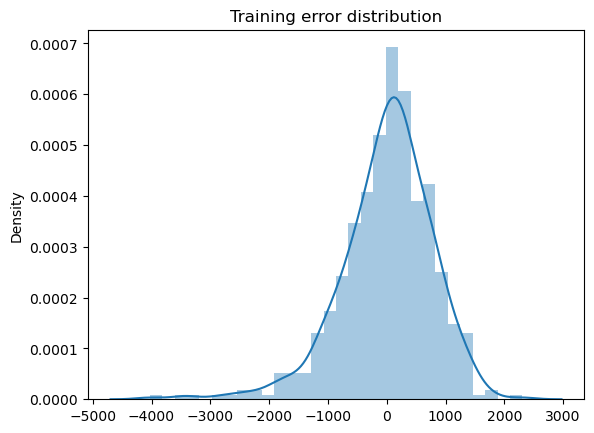

In [73]:
sns.distplot(residual)
plt.title('Training error distribution')

In [75]:
##predicion on test

#Eleminating columns from test data as well.
X_test_new=X_test[X_train_new_4.columns]

In [76]:
X_test_new.shape

(183, 12)

In [77]:
X_test_lrf=sm.add_constant(X_test_new)

In [78]:
#predict cnt value on test data
y_test_pred=lr_model_final.predict(X_test_lrf)

In [79]:
#R2 score on traing data
r2_score_train=r2_score(Y_train,y_train_pred)
print("r2_score on training data is =",r2_score_train)
#R2 score on traing data
r2_score_test=r2_score(Y_test,y_test_pred)
print("r2_score on training data is =",r2_score_test)

r2_score on training data is = 0.8335266854719467
r2_score on training data is = 0.8059416007224094


In [80]:
#finding out the mean squared error 

train_mse = (mean_squared_error(Y_train,y_train_pred))
test_mse = (mean_squared_error(Y_test,y_test_pred))
rmse_train=np.sqrt(train_mse)
rmse_test=np.sqrt(test_mse)
print('Route Mean squared error of the train set is', rmse_train)
print('Route Mean squared error of the test set is', rmse_test)

Route Mean squared error of the train set is 782.2365185095399
Route Mean squared error of the test set is 874.670846440593


In [ ]:
##The R-squared value of the train set is 83.52% 

##The R-squared value of the Test set  80.59%

##Which explains that 80% of variance in target variable is explained by input variables.

##We can conclude that the bike demands for the BoomBikes is company is dependent on the temperature,windspeed,year and season whether it is a workingday or not.

##In summer months also show low rental levels, a strong marketing strategy for the first 6 months of the year can assist in driving up the rental numbers.

##Rentals were more in 2019 than 2018 which suggests that over time more people would be exposed to this idea and there has to a strong analysis done to retain the repeat customers.